# Homework 5

Problems 11, 12, 13, 20, 23, 26

In [1]:
from functools import partial
from math import sqrt, e

from numpy import linspace
from matplotlib.pyplot import subplots, xlabel, ylabel, title, legend
from scipy.stats import norm, chisquare, chi2, beta

from resources import type2, norm_mean, norm_stddev
from resources import bounds

11. Suppose that $X_{1}, ... , X_{25}$ form a random sample from a normal distribution having a variance of 100. Graph the power of the likelihood ratio test of $H_{0}$: $μ = 0$ versus $H_{A}$: $μ ≠ 0$ as a function of $μ$, at significance levels $.10$ and $.05$. Do the same for a sample size of 100. Compare the graphs and explain what you see.

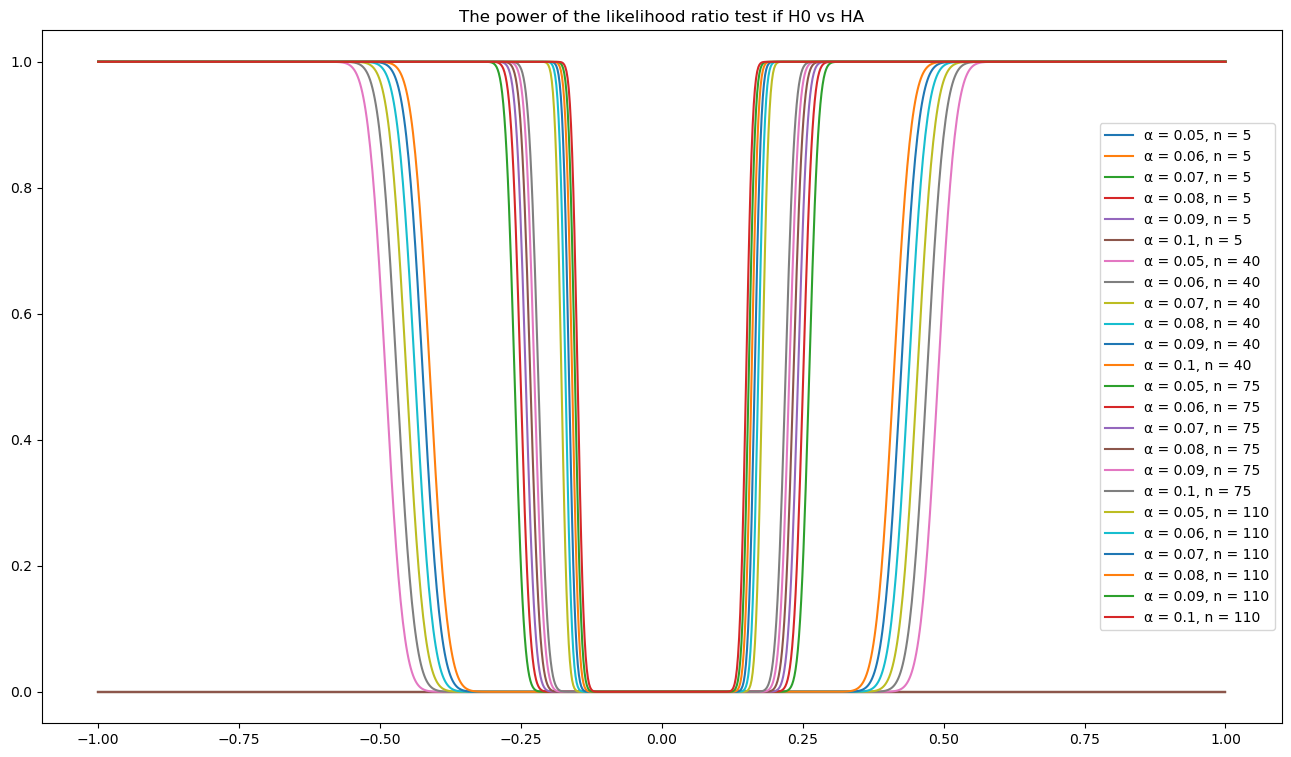

In [2]:
# setting vars
αs = [i / 100 for i  in range(5, 11)]
ns = [i for i in range(5, 111, 35)]
#αs = [0.05, 0.10]
#ns = [25, 100]
mean = 0
var = 100
stddev = sqrt(var)
rv = norm

# creating calcs for axes
x = linspace(-1, 1, 1000)
fig, ax = subplots(nrows=1, ncols=1, figsize=(16, 9))
for n in ns:
    for α in αs:
        b = [type2(p, n, α, rv,  stddev=stddev) for p in x]
        ax.plot(x, b, label=f"α = {α}, n = {n}")

title("The power of the likelihood ratio test if H0 vs HA")
ax.legend()

11 | The level of significance impacts the power of the likelihood ratio test by increasing or decreasing the width of the "fail to reject" band. An increase in the sample size appears to be proportional to a decrease the size of the "fail to reject" band, while also making the slope of the curve much sharper. This makes sense intuitively because a larger sample size could be thought of as more "evidence" behind coming to a particular conclusion, making the decision to reject the null hypothesis more stark. 

# 12. 
Let $X_{1} , ... , X_{n}$ be a random sample from an exponential distribution with the density function $f(x|θ) = θ exp[−θx]$. Derive a likelihood ratio test of $H_{0}: θ = θ_{0}$ versus $H_{A} : θ ≠ θ_{0}$, and show that the rejection region is of the form ${\bar X \exp[−θ_{0} \bar X] ≤ c}$.

Generalized likelihood ratio statistic: 
$$\Lambda = 
\frac
{max_{\theta}\in \Theta_{0} Lik({\theta})}
{max_{\theta}\in \Theta Lik({\theta})}
$$

The density function
$$
f(x | \theta) = \theta  e^{-\theta x}
$$

The likelihood function
$$
l(x | \theta_{0}) = \prod_{i = 1}^{n}\theta_{0}  e^{-\theta_{0}X_{i}}
$$

The two likelihood functions
$$
l(\theta_{0}) = \prod_{i = 1}^{n}\theta_{0}  e^{-\theta_{0}X_{i}}
$$
$$
l(\theta) = \prod_{i = 1}^{n}\theta  e^{-\theta X_{i}}
$$

Expand cumulative products and make ratio
$$
L\left(\frac{\theta_{0}}{\theta}\right) = 
\frac{\theta_{0}^{-n}  e^{-\sum_{i = 1}^{n}{-\theta_{0} X_{i}}}}{\theta^{-n}  e^{-\sum_{i = 1}^{n}{\theta X_{i}}}}
$$

For regection region
$$
\left(\frac{\theta_{0}}{\theta}  \right)^{-n}
\frac{e^{-\theta \sum_{i = 1}^{n}{X_{i}}}}{e^{-\theta_{0}\sum_{i = 1}^{n}{X_{i}}}}
\leq c
$$

Take log
$$
-n \log\left(\frac{\theta_{0}}{\theta} \right) - \theta \sum_{i = 1}^{n}{X_{i}} + \theta_{0}\sum_{i = 1}^{n}{X_{i}}\leq \log(c)
$$
$$
-n \log\left({\theta_{0}} \right)-n \log\left({\theta}\right)-\theta \sum_{i = 1}^{n}{X_{i}}+\theta_{0}\sum_{i = 1}^{n}{X_{i}}\leq \log(c)
$$

Take $\frac{\partial}{\partial \theta}$
$$
\frac{-n}{\theta} - \sum_{i = 1}^{n}{X_{i}} = 0
$$

Max likelihood when:
$$
\theta = -\frac{1}{\bar X}
$$

Sub in for regection region & simplify
$$
\frac
{\theta_{0}^{-n}  e^{-\theta_{0} n \bar X}}
{\frac{1}{\bar X}^{-n}  e^{n}}
\leq c
$$


group by exponent
$$
\left(
\frac 
{e^{-\theta_{0}\bar X}}
{\bar X \theta_{0} e}
\right)^{n}
\leq c
$$
Aggregate constants and rearrange
$$
\bar X \theta_{0} e^{\theta_{0}\bar X}
\leq c
$$


# 13. 
Suppose, to be specific, that in Problem 12, $θ_{0}= 1$, $n = 10$, and that $ = .05$. In order to use the test, we must find the appropriate value of $c$.

13a. Show that the rejection region is of the form ${\bar X ≤ x_{0}} ∪ {\bar X ≥ x_{1}}$, where $x_{0}$ and $x_{1}$ are determined by $c$.

$$
α = P(LR_{n} > z) = 1 - P(LR_{n} > z) \approx 1 - F(z)
$$
> Where $F(z)$ is the cdf of a Chi-square random variable with $df$ degrees of freedom

> If the null hypothesis is true, the likelihood ratio statistic converges to a Chi-square random variable with $df$ degrees of freedom

> The acceptance region with therefore be in the range $x_{0} \leq \bar X \leq x_{1}$, which implies that the rejection region is of the form ${\bar X ≤ x_{0}} ∪ {\bar X ≥ x_{1}}$

13b. Explain why c should be chosen so that $P\left(\bar X \exp(−\bar X) ≤ c\right) = .05$ when $θ_{0} = 1$.

> c should be chosen so that $P\left(\bar X \exp(−\bar X) ≤ c\right) = .05$ when $θ_{0} = 1$ because the significance level of the hypothesis is 0.05. The cdf of the distribution that the statistic converges to would make the test appropriate for the hypothesis.

13c. Explain why $\sum_{i = 1}^{10} X_{i}$ and hence $\bar X$ follow gamma distributions when $θ_{0} = 1$. How could this knowledge be used to choose $c$?

> The sum of exponential random variables follows a gamma distribution. This knowledge can therefore allow us to estimate the value of c by modeling a probability distribution to represent $\bar X$

13d. Suppose that you hadn’t thought of the preceding fact. Explain how you could determine a good approximation to $c$ by generating random numbers on a computer (simulation).

> A good approximation to c could be created by estimating the distribution of the sum of random variables. This is known as the bootstrap method.

20. Consider two probability density functions on $[0, 1]$: $f_{0}(x) = 1$, and $f_{1}(x) = 2x$. Among all tests of the null hypothesis $H_{0} : X ∼ f_{0}(x)$ versus the alternative $X ∼ f_{1}(x)$, with significance level $α = 0.10$, how large can the power possibly be?

$$
\alpha = \int_{\Gamma_{1}}{f_{0}}(x)dx = 0.1
$$
$$
\beta = \int_{\Gamma_{1}}{f_{1}}(x)dx
$$

Hypothesis also can be written as 
$$
H_{0}: \theta = 1, H_{1}: \theta = 2
$$
Where
$$
X \sim \beta(\theta, 1) 
\\ f_{X}(X) = \theta x^{\theta - 1}
\\ x \in [0, 1]
$$

$$
f_{0}(\theta = 1) =  \theta x^{\theta - 1} = 1
\\
f_{1}(\theta = 2) =  \theta x^{\theta - 1} = 2x
\\
\frac
{1}
{2x}
\leq c
$$
> Is uniformly most powerful because doesn't depend on $\theta$

> Power is greatest when c is smallest, so occurs when x is maximized, at $x = 1$

In [3]:
alpha = 0.10
print("max power = ",1 - beta(0.5, 1).ppf(alpha))

max power =  0.99


23. Suppose that a 99% confidence interval for the mean μ of a normal distribution is found to be (−2.0,3.0). Would a test of H0: μ = −3 versus HA: μ ≠ −3 be rejected at the .01 significance level?

> Yes, the test would result in a rejection of the null hypothesis.

> The 99% confidence interval contains the true parameter with p = 0.99, 

## 26. True or false:
a. The generalized likelihood ratio statistic is always less than or equal to 1. 
>$True.$
$$\Lambda = 
\frac
{max_{\theta}\in \Theta_{0} Lik({\theta})}
{max_{\theta}\in \Theta Lik({\theta})}
$$
> for $\Theta_{0} \subset \Theta$


b. If the p-value is .03, the corresponding test will reject at the significance level .02.
>$False.$

>The p-value is the lowest significance level of tests that will reject the null hypothesis.
>& 0.03 > 0.02

c. If a test rejects at significance level .06, then the p-value is less than or equal to .06.
>$True.$

>The p-value must be $\leq$ the significance level for the test to reject.

d. The p-value of a test is the probability that the null hypothesis is correct.
>$False.$

>The p-value is the prob that the null hypothesis is rejected while also being true. 

e. In testing a simple versus simple hypothesis via the likelihood ratio, the p-value equals the likelihood ratio.
>$False.$
>The p-value is the prob that the null hypothesis is rejected while also being true. 

>The likelihood ratio test uses the probability that the likelihood ratio $\frac{H_{0}}{H_{1}} <$ the observed value, given $H_{0}$

f. If a chi-square test statistic with 4 degrees of freedom has a value of 8.5, the p-value is less than .05.

In [4]:
f_α = 0.05
f_pval = round(1 - chi2.cdf(8.5, 4), 8)
print(f"26f. The pval of the chi-sq test stat when val=8.5, df=4 = {f_pval} | is {f_pval} < {f_α}? {f_pval < f_α}")

26f. The pval of the chi-sq test stat when val=8.5, df=4 = 0.07488723 | is 0.07488723 < 0.05? False


In [5]:
chi2.pdf(8.5, 4)

0.03031149705662341